In [8]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Load the dataset
file_path = 'data/ITA Case Detail Data 2023 through 3-16-2024.csv'
data = pd.read_csv(file_path)

C:\Users\joshr\AppData\Local\Temp\ipykernel_3392\744562119.py:3: DtypeWarning: Columns (3,25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [10]:
# Load the dataset with dtype specification
dtype_spec = {
    'ID': str,
    'establishment_ID': str,
    'establishment_name': str,
    'ein': str,
    'company_name': str,
    'street_address': str,
    'city': str,
    'state': str,
    'zip_code': str,
    'naics_code': str,
    'naics_year': str,
    'industry_description': str,
    'establishment_type': str,
    'size': str,
    'annual_average_employees': float,
    'total_hours_worked': float,
    'case_number': str,
    'date_of_incident': str,
    'incident_outcome': str,
    'dafw_num_away': float,
    'djtr_num_tr': float,
    'type_of_incident': str,
    'time_started_work': str,
    'time_of_incident': str,
    'time_unknown': str,
    'date_of_death': str,
    'created_timestamp': str,
    'year_of_filing': str,
    'job_title': str,
    'SOC_code': str,
    'SOC_description': str,
    'incident_location': str,
    'incident_description': str,
    'nar_before_incident': str,
    'nar_what_happened': str,
    'nar_injury_illness': str,
    'nar_object_substance': str
}

data = pd.read_csv(file_path, dtype=dtype_spec)

In [11]:
data.head()

,id,establishment_id,establishment_name,ein,company_name,street_address,city,state,zip_code,naics_code,...,incident_outcome,dafw_num_away,djtr_num_tr,type_of_incident,time_started_work,time_of_incident,time_unknown,date_of_death,created_timestamp,year_filing_for
0,446827,41940,AristaCare at Meadow Springs,204755042,AristaCare at Meadow Springs LLC,845 Germantown Pike,Plymouth Meeting,PA,19462,623110,...,4,0.0,0.0,6,7:00:00.000,14:45:00.000,0,NaN,26FEB24:20:47:00,2023
1,448949,41940,AristaCare at Meadow Springs,204755042,AristaCare at Meadow Springs LLC,845 Germantown Pike,Plymouth Meeting,PA,19462,623110,...,3,0.0,18.0,1,23:00:00.000,NaN,1,NaN,26FEB24:21:03:00,2023
2,449370,41940,AristaCare at Meadow Springs,204755042,AristaCare at Meadow Springs LLC,845 Germantown Pike,Plymouth Meeting,PA,19462,623110,...,2,180.0,0.0,1,7:00:00.000,10:30:00.000,0,NaN,26FEB24:21:12:00,2023
3,449479,41940,AristaCare at Meadow Springs,204755042,AristaCare at Meadow Springs LLC,845 Germantown Pike,Plymouth Meeting,PA,19462,623110,...,2,105.0,0.0,1,7:00:00.000,15:30:00.000,0,NaN,26FEB24:21:16:00,2023
4,450502,41940,AristaCare at Meadow Springs,204755042,AristaCare at Meadow Springs LLC,845 Germantown Pike,Plymouth Meeting,PA,19462,623110,...,4,0.0,0.0,6,7:00:00.000,12:00:00.000,0,NaN,26FEB24:21:28:00,2023


C:\Users\joshr\AppData\Local\Temp\ipykernel_3392\2040498837.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  incidents_over_time = data.resample('M').size()


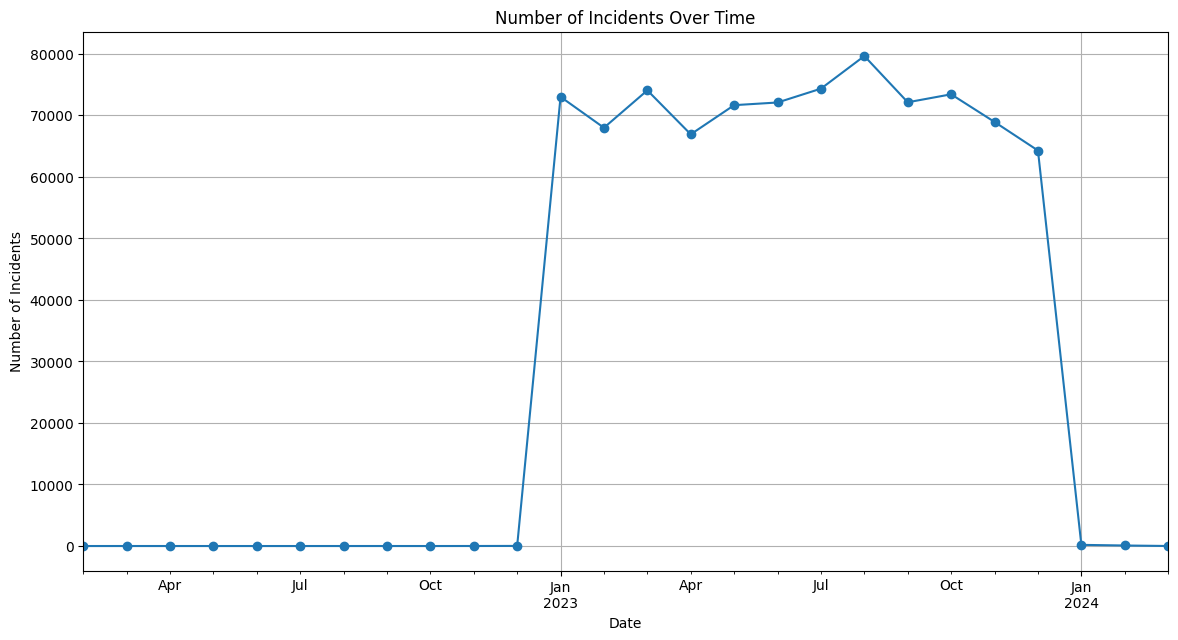

In [12]:
# Assuming 'data' is your dataframe
# Convert 'date_of_incident' to datetime format
data['date_of_incident'] = pd.to_datetime(data['date_of_incident'], format='%m/%d/%Y')

# Set 'date_of_incident' as the index
data.set_index('date_of_incident', inplace=True)

# Resample to get the number of incidents per month
incidents_over_time = data.resample('ME').size()

# Plot the number of incidents over time
plt.figure(figsize=(14, 7))
incidents_over_time.plot(kind='line', marker='o')
plt.title('Number of Incidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Incidents')
plt.xlim(data.index.min(), data.index.max())
plt.grid(True)
plt.show()